In [120]:
imgname = "hummel.png"

---
Below here be dragons, only touch the cells if you know what you are doing
---

In [70]:
from PIL import Image, ImageFilter, ImageDraw, ImageDraw2, ImageFont, ImageOps
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
from io import BytesIO
import numpy as np
from IPython.display import Markdown

#for widgets
%matplotlib nbagg

#some setup
def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()


# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
# display pil image (dpi)
dpi = png_formatter.for_type(Image.Image, display_pil_image)


In [121]:

o = widgets.IntSlider(min=1, max=32, value=8, description="Pixels")
u = widgets.IntSlider(min=1, max=32, value=8, description="Colors")
param_quantMode = widgets.Dropdown(description="Mode", options=[Image.FASTOCTREE, Image.MAXCOVERAGE, Image.MEDIANCUT, Image.LIBIMAGEQUANT ])
param_resizeMode = widgets.Dropdown(description="Mode", options=[Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS ])
param_fixedPalette = widgets.Checkbox(description='Fixed palette')


piximg = ""

def pixelate(input_file_path, pixel_size):
    image = Image.open(input_file_path)
    image = image.resize(
        (image.size[0] // pixel_size, image.size[1] // pixel_size),
        param_resizeMode.value
    ) 
    #image = image.resize(
    #    (image.size[0] * pixel_size, image.size[1] * pixel_size),
    #    param_resizeMode.value
    #)
    return image
 

def convertImage(c,d,e,f,g,h):
    piximg = pixelate(imgname,o.value)

    if param_fixedPalette.value:
        #palettedata =  [255,255,255,255,255,0]
        palettedata =  [255,255,255,93,143,241,233,136,56,239,148,84 ]
        while len(palettedata) < 768:
            palettedata.append(0)
            palettedata.append(0)
            palettedata.append(0)
        palimage = Image.new('P', (12, 12))
        palimage.putpalette(palettedata)
        piximg = piximg.quantize(method=param_quantMode.value, colors=u.value, dither=Image.NONE, palette=palimage)
    else:
        piximg = piximg.quantize(method=param_quantMode.value,dither=0,colors=u.value,kmeans=1)

    piximg = piximg.convert("RGB")
    na = np.array(piximg) 
    colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)    

    mdtxt = "<pre>"
    for a in colours:
        colour = "%0.2X%0.2X%0.2X" % (a[0], a[1], a[2])
        mdtxt = mdtxt + str(a[0])+","+str(a[1])+","+str(a[2])+" ("+"<span style='color: #"+colour+"'>this</span>)<BR>";
    mdtxt = mdtxt + "</pre>"
    if h:
        #display.display(piximg)
        display.display(Markdown(mdtxt))
    return piximg
    #print(colours)
    
widgets.interact(convertImage, c=o, d=u, e=param_fixedPalette, f=param_quantMode, g=param_resizeMode, h=True)


interactive(children=(IntSlider(value=8, description='Pixels', max=32, min=1), IntSlider(value=8, description=…

<function __main__.convertImage(c, d, e, f, g, h)>

In [122]:
piximg = convertImage(c=o, d=u, e=param_fixedPalette, f=param_quantMode, g=param_resizeMode, h=False)
pixarr = np.array(piximg)
pixpal = {}
pixidx = 0
pixlit = "abcdefghijklmnopqrstuvwxyz1234567890!§$%&/()#+\\\"-.:"

mdtxt = "<pre>"

for x in pixarr:
    for a in x:
        colour = "%0.2X%0.2X%0.2X" % (a[0], a[1], a[2])
        out = "?"
        if colour in pixpal:
            out = pixpal[colour]
        else:
            pixpal[colour] = str(pixidx)
            pixidx = pixidx+1
            out = pixpal[colour]
        out = pixlit[int(out)]

        mdtxt = mdtxt + "<span style='color: #"+colour+"'>"+out+"</span>"
    mdtxt = mdtxt+"<BR>"

mdtxt = mdtxt + "</pre>"
display.display(Markdown(mdtxt))
    
    

<pre><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #5CBCE9'>f</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #5CBCE9'>f</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #5CBCE9'>f</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #5CBCE9'>f</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #71C4EA'>e</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #CAE6F0'>c</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #5CBCE9'>f</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #71C4EA'>e</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #9FD6ED'>d</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #E6D618'>g</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #211B06'>b</span><span style='color: #211B06'>b</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><span style='color: #000000'>a</span><BR></pre>

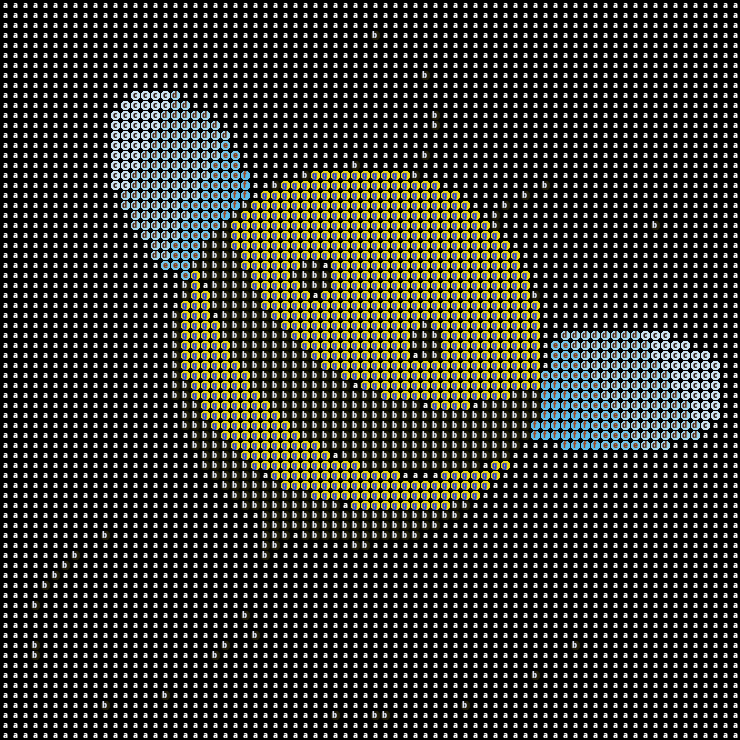

In [123]:
piximg = convertImage(c=o, d=u, e=param_fixedPalette, f=param_quantMode, g=param_resizeMode, h=False)
pixarr = np.array(piximg)
pixpal = {}
pixidx = 0
pixlit = "abcdefghijklmnopqrstuvwxyz1234567890!§$%&/()#+\\\"-.:"
diamondSize = 10
fontSize = 8

fnt = ImageFont.truetype("NotoSans-Black.ttf", fontSize)
newpix = Image.new('RGB',(piximg.size[0]*diamondSize,piximg.size[1]*diamondSize))

newpixdc = ImageDraw.Draw(newpix)

xcnt = 0
ycnt = 0
for x in pixarr:
    xcnt = 0
    for a in x:
        
        colour = "%0.2X%0.2X%0.2X" % (a[0], a[1], a[2])
        out = "?"
        if colour in pixpal:
            out = pixpal[colour]
        else:
            pixpal[colour] = str(pixidx)
            pixidx = pixidx+1
            out = pixpal[colour]
        out = pixlit[int(out)]

        invcolor = (255-a[0],255-a[1],255-a[2])
        newpixdc.ellipse(((xcnt*diamondSize,ycnt*diamondSize),(xcnt*diamondSize+(diamondSize),ycnt*diamondSize+diamondSize)),(a[0],a[1],a[2]),(0,0,0))
        newpixdc.text((xcnt*diamondSize+(diamondSize/2),ycnt*diamondSize+(diamondSize/2)),out,invcolor,font=fnt,anchor="mm")


        xcnt = xcnt + 1
    ycnt = ycnt + 1

display.display(newpix)

---
Below this point are only tests I ran

(80, 47)


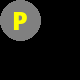

In [73]:
print(piximg.size)
#newpix = Image.new('RGB',(piximg.size[0]*40,piximg.size[1]*40))
newpix = Image.new('RGB',(80,80))
fnt = ImageFont.truetype("NotoSans-Black.ttf", 25)

x = ImageDraw.Draw(newpix)
x.ellipse(((0,0),(40,40)),(128,128,128),(128,128,128))
x.text((20,20),"P",(255,255,0),font=fnt,anchor="mm")

display.display(newpix)